# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [34]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [8]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()

720

In [9]:
#  2. Modify our df to have all duplicate rows removed. 

print("shape before drop_duplicates:",df.shape)
df=df.drop_duplicates()
print("shape after drop_duplicates:",df.shape)

shape before drop_duplicates: (11914, 15)
shape after drop_duplicates: (11194, 15)


In [10]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [11]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [13]:
# * Print how long our dataframe is.

df.shape

(11194, 15)

In [16]:
# * Remove any row that has a null value in it. 

df=df.dropna()

In [17]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.shape


(11092, 15)

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:ylabel='Make'>

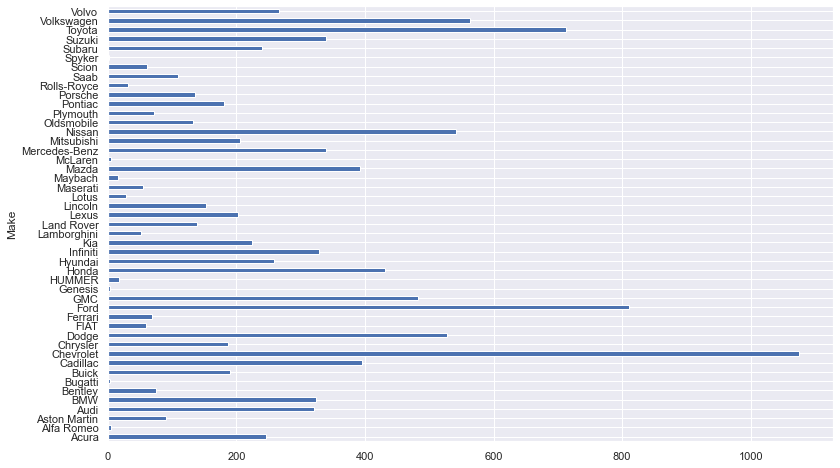

In [23]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

gb=df.groupby('Make')
brand_count=gb['Make'].count()
brand_count.plot(kind='barh',figsize=(13,8))


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:ylabel='Make'>

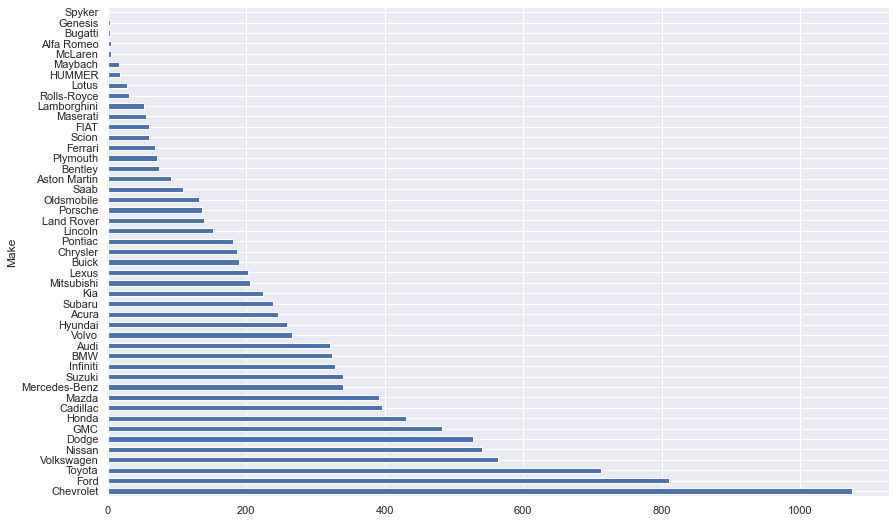

In [29]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

brand_count=brand_count.sort_values(ascending=False)
brand_count.plot(kind='barh',figsize=(14,9))

# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year', ylabel='MSRP'>

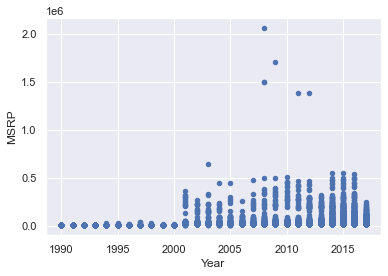

In [35]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
df.plot(kind='scatter',x='Year',y='MSRP')


In [36]:
df.describe()
#range for MSRP is huge

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [42]:
# Make a column where is 10 when year is less than 2000, else 1.
df['price adjuster']=np.where(df['Year']<2000,10,1)

# Multiply the MSRP by the price adjuster.
df['adjusted_price']=df['price adjuster']*df['MSRP']

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 100000.0)

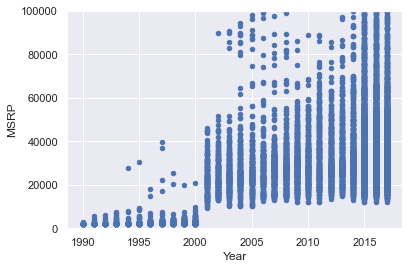

In [44]:
# Plot new prices
ax=df.plot(kind='scatter',x='Year',y='MSRP')
ax.set_ylim(0, 100000)


# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [45]:
# What are the top 5 car makers make the most expensive cars on average. 
gp_5cars=df.groupby('Make')
gp_5cars['adjusted_price'].mean()

Make
Acura            3.757348e+04
Alfa Romeo       6.160000e+04
Aston Martin     1.979104e+05
Audi             5.594887e+04
BMW              6.278847e+04
Bentley          2.471693e+05
Bugatti          1.757224e+06
Buick            3.100469e+04
Cadillac         5.679390e+04
Chevrolet        3.108457e+04
Chrysler         2.904799e+04
Dodge            2.785066e+04
FIAT             2.267024e+04
Ferrari          2.382188e+05
Ford             3.159488e+04
GMC              3.374590e+04
Genesis          4.661667e+04
HUMMER           3.646441e+04
Honda            2.742922e+04
Hyundai          2.578516e+04
Infiniti         4.318280e+04
Kia              2.546602e+04
Lamborghini      3.315673e+05
Land Rover       7.632255e+04
Lexus            4.943568e+04
Lincoln          4.423055e+04
Lotus            6.918828e+04
Maserati         1.142077e+05
Maybach          5.462219e+05
Mazda            2.364728e+04
McLaren          2.398050e+05
Mercedes-Benz    7.613876e+04
Mitsubishi       2.509921e+04
Nissa

# What are the 5 car makers that have the highest median highway MPG?

In [17]:
# Which car makers have the highest median highway MPG?



# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

In [19]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.



# Remake the same histogram, but limit the x-axis from 0 to 100,000

In [20]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000



# Plot the relationship between Engine HP and highway MPG

In [22]:
# Plot the relationship between Engine HP and highway MPG


# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

In [23]:
# create a boxplot for the 'Engine HP'


# Make another boxplot for highway MPG

In [24]:
# create a boxplot for the 'highway MPG'


# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [25]:
# Remove any  outliers from Engine HP and highway MPG 


# Remake the boxplots for both Engine HP and highway MPG


In [26]:
# Engine HP boxplot


In [27]:
# highway MPG boxplot



# Make a scatter plot of Engine HP vs highway MPG

In [28]:
# Make a scatter plot of Engine HP vs highway MPG


# What does this plot tell you about how Engine HP affects highway MPG?

In [34]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Your answer here.')

Your answer here.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

In [30]:
# Using a pairplot, display all of the linear relationship.



In [31]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).



# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

In [32]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8




In [33]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Your answer here')

Your answer here


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [35]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

